In [143]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
data=pd.read_csv('titanic_data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
df=data.copy()

In [146]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [147]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [148]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [149]:
df.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)

In [150]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [176]:
def mapping(sex):
    return 1 if sex=='male' else 0 
df['Sex'] = df['Sex'].apply(mapping)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,dummy_C,dummy_Q,dummy_S
0,0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,0,26.000000,0,0,30.0000,1,0,0


In [177]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [153]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [154]:
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [155]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [156]:
dummies=pd.get_dummies(df.Embarked,prefix='Embarked_dummy')
df=pd.concat([df,dummies],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,dummy_C,dummy_Q,dummy_S
0,0,3,1,22.000000,1,0,7.2500,S,0,0,1
1,1,1,0,38.000000,1,0,71.2833,C,1,0,0
2,1,3,0,26.000000,0,0,7.9250,S,0,0,1
3,1,1,0,35.000000,1,0,53.1000,S,0,0,1
4,0,3,1,35.000000,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,0,0,1
887,1,1,0,19.000000,0,0,30.0000,S,0,0,1
888,0,3,0,29.699118,1,2,23.4500,S,0,0,1
889,1,1,1,26.000000,0,0,30.0000,C,1,0,0


In [157]:
df.drop('Embarked',axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,dummy_C,dummy_Q,dummy_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


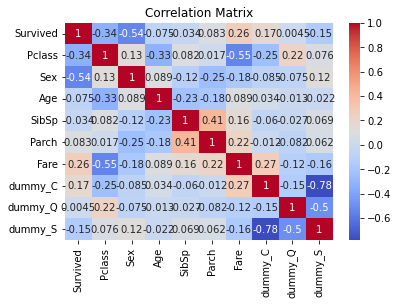

In [170]:
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title and display the plot
plt.title('Correlation Matrix')
plt.show()

In [158]:
X=df.drop('Survived',axis=1)
y=df['Survived']


In [215]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((711, 9), (178, 9))

In [216]:
from sklearn.preprocessing import StandardScaler
#scaling the features 
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [217]:
X_train_scaled.shape,y_train.shape,X_test_scaled.shape,y_test.shape

((711, 9), (711,), (178, 9), (178,))

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#from xgboost import XGBClassifier

def train_and_test(x_train,y_train,x_test,y_test):
    
    classifiers = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(max_depth=5),
        'Random Forest': RandomForestClassifier(n_estimators=100),
        'Support Vector Machine': SVC(kernel='rbf'),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        #'Neural Network': MLPClassifier(hidden_layer_sizes=(100,)),
        'AdaBoost': AdaBoostClassifier(n_estimators=100),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
        #'XGBoost': XGBClassifier(n_estimators=100)
    }
    
    accuracy_={}
    trained_models={}
    
    for name,model in classifiers.items():
        print(f'Training : {name}')
        model.fit(x_train,y_train)
        
        #print(f'Testing : ')
        
        trained_models[name]=model

        y_pred=model.predict(x_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        accuracy_[name]=accuracy
        
    return  accuracy_,trained_models

    
        
        


In [219]:
accuracy_,trained_models=train_and_test(X_train_scaled,y_train,X_test_scaled,y_test)


Training : Logistic Regression
Training : Decision Tree
Training : Random Forest
Training : Support Vector Machine
Training : K-Nearest Neighbors
Training : Naive Bayes
Training : AdaBoost
Training : Gradient Boosting


In [220]:
acc_df = pd.DataFrame.from_dict(accuracy_, orient='index', columns=['Accuracy'])
acc_df.reset_index(inplace=True)
acc_df.rename(columns={'index': 'Model'}, inplace=True)
acc_df.sort_values(by='Accuracy', ascending=False).style.highlight_max(axis=0)

,Model,Accuracy
3,Support Vector Machine,0.831461
1,Decision Tree,0.820225
6,AdaBoost,0.803371
7,Gradient Boosting,0.803371
4,K-Nearest Neighbors,0.792135
0,Logistic Regression,0.775281
2,Random Forest,0.775281
5,Naive Bayes,0.764045


In [221]:
best_model_key=acc_df.loc[acc_df['Accuracy'].idxmax()]
best_model=trained_models[best_model_key[0]]
best_model

SVC()

In [222]:
#saving the model and the scaler

import pickle

with open(best_model_key[0]+'.pkl','wb') as f:
    pickle.dump(best_model,f)
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [223]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have already trained and obtained predictions from a classification model
y_true=y_test
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)

# Calculate precision score
precision = precision_score(y_true, y_pred)
print('Precision:', precision)

# Calculate recall score
recall = recall_score(y_true, y_pred)
print('Recall:', recall)

# Calculate F1-score
f1 = f1_score(y_true, y_pred)
print('F1-score:', f1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)


Accuracy: 0.8314606741573034
Precision: 0.8095238095238095
Recall: 0.7391304347826086
F1-score: 0.7727272727272727
Confusion Matrix:
[[97 12]
 [18 51]]


In [268]:
#Prediction on  unseen_data
test_data=pd.read_csv('titanic_data/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [269]:
test_data.drop(['PassengerId','Ticket','Cabin','Name'],axis=1,inplace=True)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [270]:
#unseen_data_preprocessing
test_data['Sex']=test_data['Sex'].apply(mapping)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
dummies=pd.get_dummies(test_data.Embarked,prefix='Embarked_dummy')
test_data=pd.concat([test_data,dummies],axis=1)
test_data.drop('Embarked',axis=1,inplace=True)


In [273]:
test_data.dropna(inplace=True)

In [274]:
scaled_test_data=scaler.transform(test_data.values)
pass_sur=model.predict(scaled_test_data)

In [277]:
count1 = np.count_nonzero(pass_sur == 1)
count0 = np.count_nonzero(pass_sur == 0)
print(f'Passengers survive : {count1}')
print(f' : {count1}')

NameError: name 'array' is not defined

In [224]:
# Testing on users

In [244]:
#loading models and scaler
with open('Support Vector Machine.pkl','rb') as f:
    model=pickle.load(f)
with open('scaler.pkl','rb') as f:
    scaler=pickle.load(f)
    

In [256]:
def Embark_mapping(category):
    new_data = pd.DataFrame(columns=['S', 'Q', 'C'])
    new_data.loc[0,category] = 1
    new_data=new_data.fillna(0)
    return new_data.values.tolist()[0]
def survival_mapping(x):
    if x==1 :
        print('Passenger will Survive ')
    else:
        print('Passenger will not Survive')

In [257]:
#Passenger_class(3,2,1)
Passenger_class=3
#male or female
Sex='male'
Sex=mapping(Sex)
#Age
Age=28
#"Siblings/Spouses"
SibSp=2
#"Parents/Children"
Parch=3

Fare=120
# 'Embarked' column provides information about the passengers' boarding locations,
#C': Represents Cherbourg, France
#'Q': Represents Queenstown, Ireland (now known as Cobh)
#'S': Represents Southampton, England
Embark='S'
embark=Embark_mapping(Embark)
features=[Passenger_class,Sex,Age,SibSp,Parch,Fare]+embark

In [259]:
#scaling_features
feature=np.array(features).reshape(1,-1)
#scaling
scaled_feature=scaler.transform(feature)
#predicting
pass_prediction=best_model.predict(scaled_feature)
#mapping
print('Chance are 83% that :')
survival_mapping(pass_prediction[0])


Chance are 83% that :
Passenger will not Survive
